<a href="https://colab.research.google.com/github/malcolmlett/robovac/blob/main/Experiment_Arch_to_LDS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proves out that I I can do the same thing via code from github

In [1]:
import os
if os.path.isdir('repo'):
  !cd repo && git pull
else:
  !git clone https://github.com/malcolmlett/robovac.git repo

Cloning into 'repo'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 38 (delta 13), reused 23 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 367.34 KiB | 5.83 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import requests
import math
from repo import lds
from importlib import reload
reload(lds)

<module 'repo.lds' from '/content/repo/lds.py'>

In [3]:
# Load single black'n'white image as source data from github
#arch = Image.open()
url = "https://github.com/malcolmlett/robovac/blob/main/data/experimental-architecture1.png?raw=true"
arch = Image.open(requests.get(url, stream=True).raw)
arch = np.array(arch, dtype=np.bool_)
arch.shape

(84, 94)

points: (3600, 2)


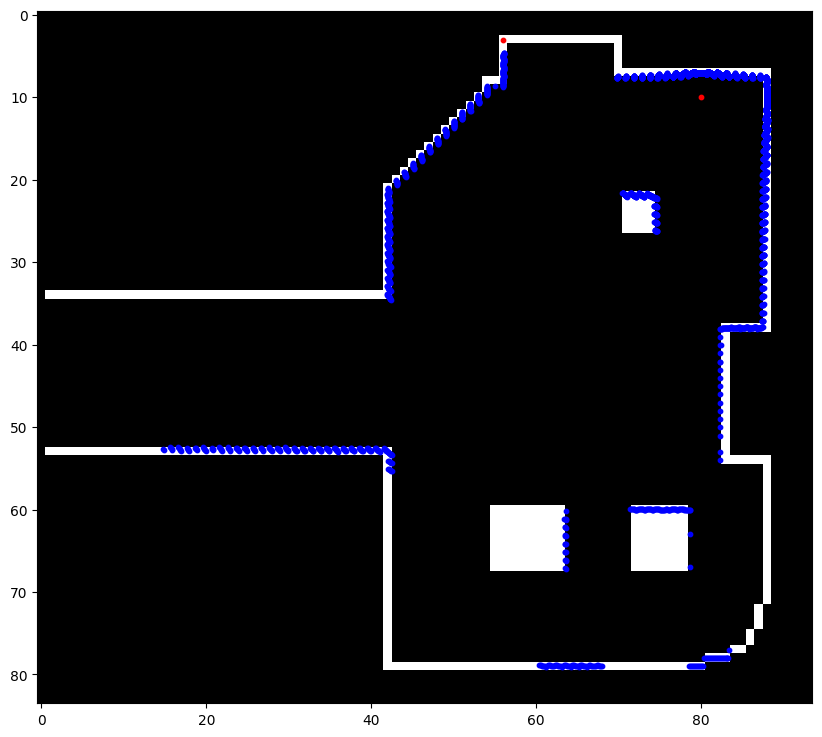

In [14]:
# Plot lds data
# (note that pixels span +/- 0.5 either side of their integer positions)
loc = (80, 10)
points = lds.lds_to_2d(lds.lds_sample(arch, loc, 0.0, pixel_size=1, resolution=math.pi/180*0.1), loc, 0.0)
print(f"points: {points.shape}")
plt.figure(figsize=(10, 10))
plt.imshow(arch, cmap='gray')
#for x, y in points:
#  plt.plot([loc[0], x], [loc[1], y], color='grey', linewidth=0.5)
plt.scatter(loc[0], loc[1], c='r', s=10)
plt.scatter(56, 3, c='r', s=10)
plt.scatter(points[:,0], points[:,1], c='b', s=10)
plt.show()